### Installed Libraries

In [1]:
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
# pip install tensorflow
# pip install --upgrade keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loaded Data

In [2]:
df = pd.read_csv('Bank_Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df2 = df[[ 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']]
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

Checked to see if there were any missing values in each variable 

In [4]:
df2.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Count Plot

Count plot of the dependent variable to see the frequency of each outcome.

0    7963
1    2037
Name: Exited, dtype: int64


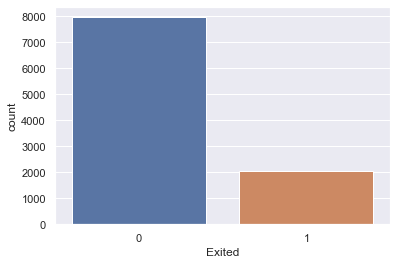

In [6]:
print(df2['Exited'].value_counts())
sns.set(style="darkgrid")
ax = sns.countplot(x="Exited", data=df2)

#### Mean, Median, Standard Deviation

Examined the mean, median, and standard deviation for all numeric variables by the dependent variable. People that are leaving the bank tend to be older and have a higher credit score and salary than people who stay with the bank. People that stay with the bank tend to use more of the bank’s products.

In [7]:
print('Mean by Exited')
print(df2.groupby(['Exited']).agg({'Age':'mean', 'CreditScore':'mean', 'Balance':'mean','EstimatedSalary':'mean','Tenure':'mean','NumOfProducts':'mean'}))
print('--'*40)
print('Median by Exited')
print(df2.groupby(['Exited']).agg({'Age':'median', 'CreditScore':'median', 'Balance':'median','EstimatedSalary':'median','Tenure':'median','NumOfProducts':'median'}))
print('--'*40)
print('Standard Deviation by Exited')
print(df2.groupby(['Exited']).agg({'Age':'std', 'CreditScore':'std', 'Balance':'std','EstimatedSalary':'std','Tenure':'std','NumOfProducts':'std'}))
print('--'*40)


Mean by Exited
              Age  CreditScore       Balance  EstimatedSalary    Tenure  \
Exited                                                                    
0       37.408389   651.853196  72745.296779     99738.391772  5.033279   
1       44.837997   645.351497  91108.539337    101465.677531  4.932744   

        NumOfProducts  
Exited                 
0            1.544267  
1            1.475209  
--------------------------------------------------------------------------------
Median by Exited
        Age  CreditScore    Balance  EstimatedSalary  Tenure  NumOfProducts
Exited                                                                     
0        36          653   92072.68         99645.04       5              2
1        45          646  109349.29        102460.84       5              1
--------------------------------------------------------------------------------
Standard Deviation by Exited
              Age  CreditScore       Balance  EstimatedSalary    Tenure  \
E

#### Count plot by Dependent Variable

Count plots for categorical variables were created to gain an understanding of the frequency within each category by the dependent variable. The “Geography” plot shows that people are leaving at the highest rate in Germany out of any other country. The “HasCrCard” plot shows that it is pretty even between people with cards and without cards leaving or staying with the bank. While the “IsActiveMember’ plot shows that people that are not active members tend to leave at a higher rate. 

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

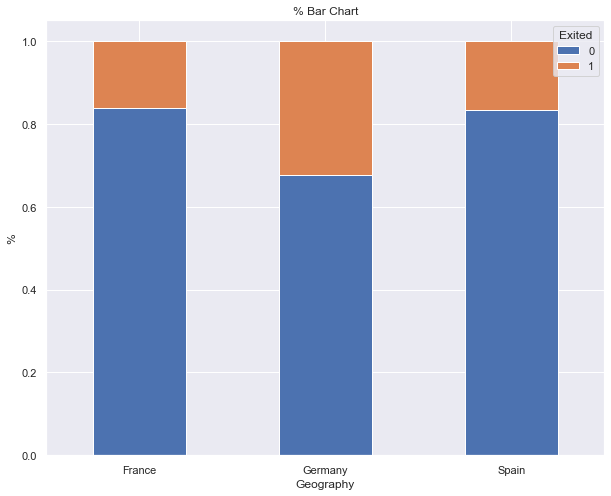

In [8]:
print(df2.groupby(['Exited', 'Geography']).size())
s = df2.groupby(['Geography', 'Exited']).size().unstack('Exited', fill_value=0)
df_s = s[[0, 1]] =s[[0, 1]].apply(lambda x: x/x.sum(), axis=1)
plt.rcParams['figure.figsize'] = [10, 8]
df_s.plot(kind='bar', stacked = True, title = '% Bar Chart',)
plt.ylabel('%')
plt.xticks(rotation=0)

Exited  HasCrCard
0       0            2332
        1            5631
1       0             613
        1            1424
dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

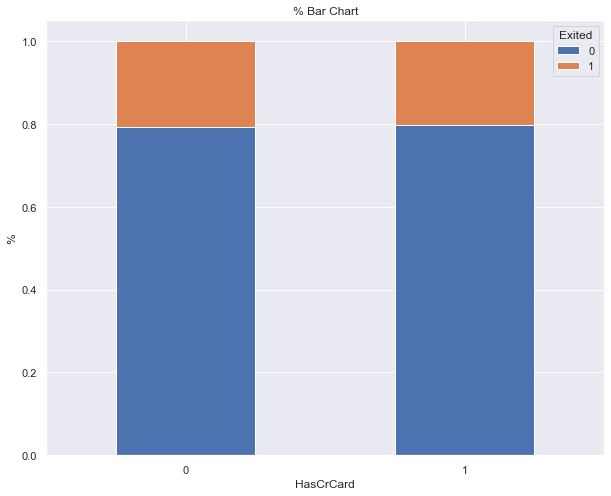

In [9]:
print(df2.groupby(['Exited', 'HasCrCard']).size())
s = df2.groupby(['HasCrCard', 'Exited']).size().unstack('Exited', fill_value=0)
df_s = s[[0, 1]] =s[[0, 1]].apply(lambda x: x/x.sum(), axis=1)
plt.rcParams['figure.figsize'] = [10, 8]
df_s.plot(kind='bar', stacked = True, title = '% Bar Chart',)
plt.ylabel('%')
plt.xticks(rotation=0)

Exited  IsActiveMember
0       0                 3547
        1                 4416
1       0                 1302
        1                  735
dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

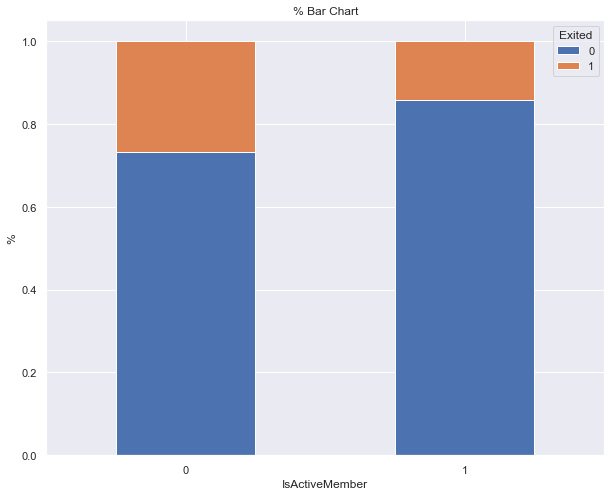

In [10]:
print(df2.groupby(['Exited', 'IsActiveMember']).size())
s = df2.groupby(['IsActiveMember', 'Exited']).size().unstack('Exited', fill_value=0)
df_s = s[[0, 1]] =s[[0, 1]].apply(lambda x: x/x.sum(), axis=1)
plt.rcParams['figure.figsize'] = [10, 8]
df_s.plot(kind='bar', stacked = True, title = '% Bar Chart',)
plt.ylabel('%')
plt.xticks(rotation=0)

#### Correlation

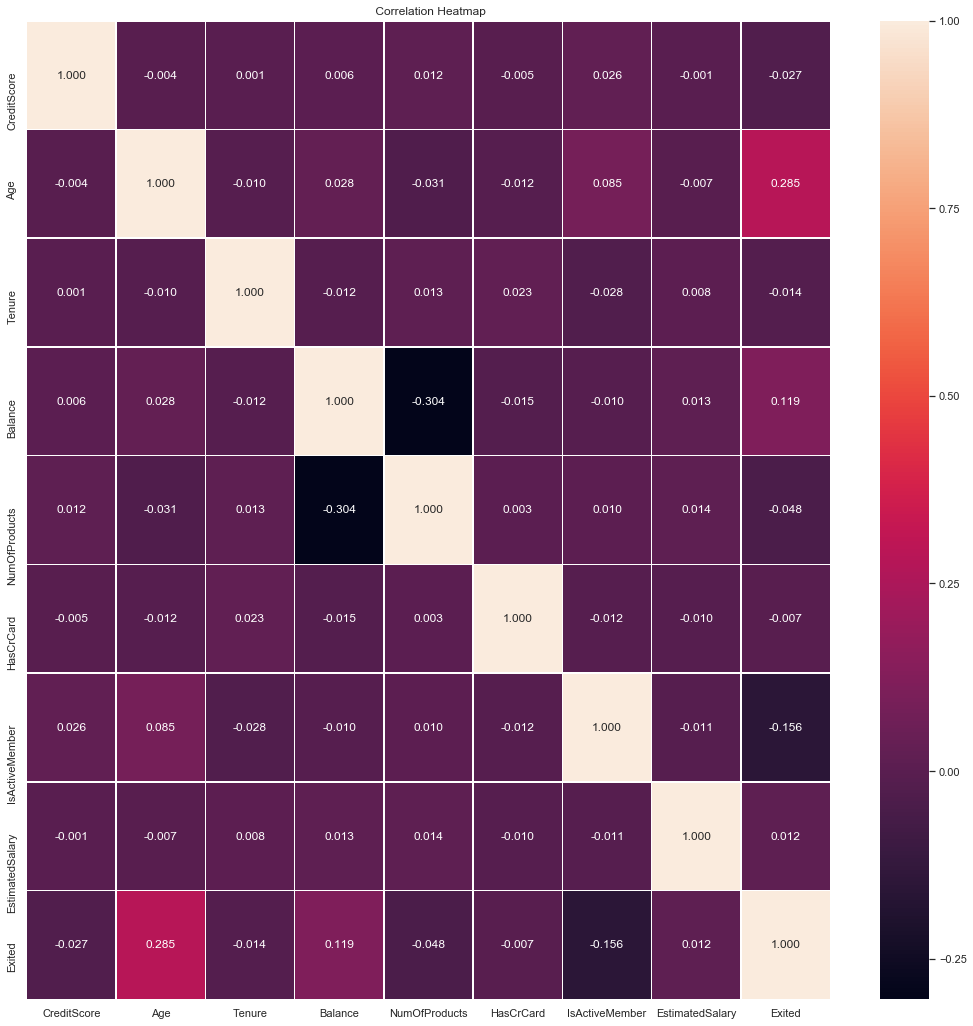

In [11]:
cor = df2.corr()
f,ax = plt.subplots(figsize = (18,18))
plt.title(' Correlation Heatmap')
sns.heatmap(cor, annot = True, linewidths = .5, fmt='.3f', ax = ax)

## Pre - Processing

In the pre-processing step the “Geography” variable was turned in to three dummy variables with one of the three being left out. Also, the “Gender” variable was coded in to 0 and 1. 

In [13]:
from sklearn.preprocessing import LabelEncoder
df3 = pd.get_dummies(df2, columns=['Geography'],drop_first=True)
lc = LabelEncoder()
df3['Gender'] = lc.fit_transform(df3['Gender'])

## Modeling 

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

def model_info(x, y, acc,loss, model_name):
    rec = recall_score(x,y)
    rec_0 = recall_score(x,y, pos_label=0)
    data = [{"Model Name":model_name, "Accuracy":acc, "Loss":loss, "Specificity":rec_0, "Sensitivity":rec,}]
    df = pd.DataFrame(data)
    df1 = df[['Model Name', "Accuracy", "Loss", "Specificity","Sensitivity" ]]
    return (df1)

In [16]:
X = df3.drop('Exited', axis = 1)
y = df3.Exited

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Rectified Linear Unit

The first model used the rectified activation function with a stochastic gradient descent optimizer. A test was done to see which learning rate was the best for this model. The best learning rate was 0.1 based on accuracy and loss. Also, a dropout layer is added to help the model from overfitting. 

In [19]:
for i in (0.001, 0.01,0.1,1):
    model = Sequential()
    model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    model.add(keras.layers.Dropout(.40))
    model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    sgb = SGD(lr = i)
    model.compile(optimizer = sgb, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model_fit = model.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8)
    train_loss,train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    print ('Learning Rate ', i)
    print('loss:', train_loss)
    print('accuracy:', train_accuracy)
    print('--'*40)

Learning Rate  0.001
loss: 0.5076320156097412
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Learning Rate  0.01
loss: 0.35849843832651773
accuracy: 0.8503999710083008
--------------------------------------------------------------------------------
Learning Rate  0.1
loss: 0.35894222497940065
accuracy: 0.8565333485603333
--------------------------------------------------------------------------------
Learning Rate  1
loss: 0.5261075407981872
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------


In [20]:
model = Sequential()
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(keras.layers.Dropout(.40))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
sgb = SGD(lr = 0.1)
model.compile(optimizer = sgb, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_fit = model.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8, validation_split = 0.2)

As the number of epochs increases the loss decreases for both the train and validation set. There isn’t much difference between the two which means that there isn't much overfitting. 

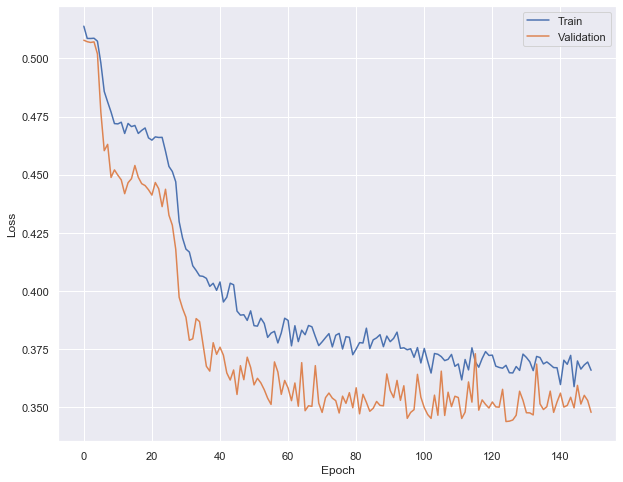

In [21]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

As the number of epochs increases the accuracy also increases for both the train and validation set. There isn’t much difference between the two which means that there isn't much overfitting.

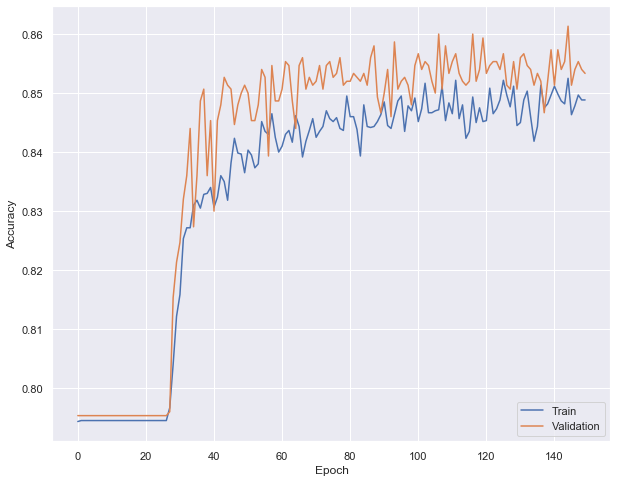

In [22]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

In [23]:
train_loss,train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)
print('--'*40)
test_loss1,test_accuracy1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss1)
print('Test accuracy:', test_accuracy1)

Train loss: 0.335066028658549
Train accuracy: 0.8630666732788086
--------------------------------------------------------------------------------
Test loss: 0.3392338811159134
Test accuracy: 0.8664000034332275


Accuracy: 0.8664


Text(0.5, 48.5, 'Predicted')

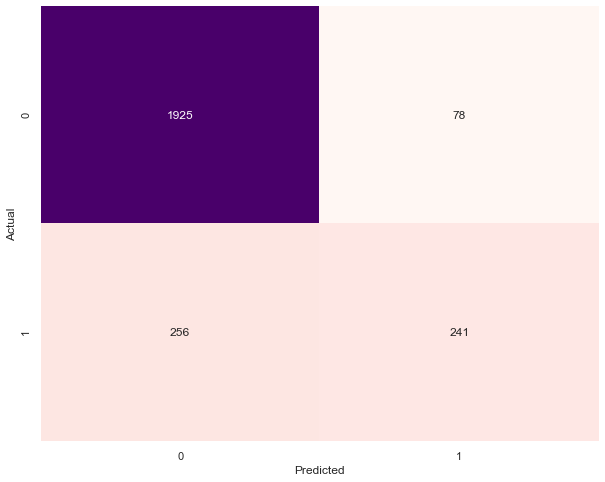

In [24]:
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, recall_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('Accuracy:',accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Model Metrics

The accuracy is reasonable for this model. The major problem that can be seen from the model metrics is that the specificity is low. This means when the person is actually leaving the bank the model is only right around 41% of the time. 

In [25]:
lr1 = model_info(y_test,y_pred, acc = test_accuracy1, loss = test_loss1, model_name = 'Rectified Linear Unit')
print(lr1)

              Model Name  Accuracy      Loss  Specificity  Sensitivity
0  Rectified Linear Unit    0.8664  0.339234     0.961058     0.484909


### Hyperbolic tangent activation function 

The second model used the hyperbolic tangent activation function
with a stochastic gradient descent optimizer. A test was done to see which learning rate was the best for this model. The best learning rate was 0.1 based on accuracy and loss. Also, a dropout layer is added to help the model from overfitting.


In [26]:
for i in (0.001,0.01,0.1,1):
    model2 = Sequential()
    model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh', input_dim = X_train.shape[1]))
    model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh'))
    model2.add(keras.layers.Dropout(.40))
    model2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    sgb = SGD(lr = i)
    model2.compile(optimizer = sgb, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model_fit2 = model2.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8)
    train_loss,train_accuracy = model2.evaluate(X_train, y_train, verbose=0)
    print ('Learning Rate ', i)
    print('loss:', train_loss)
    print('accuracy:', train_accuracy)
    print('--'*40)

Learning Rate  0.001
loss: 0.5075768906593323
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Learning Rate  0.01
loss: 0.3820705637931824
accuracy: 0.8405333161354065
--------------------------------------------------------------------------------
Learning Rate  0.1
loss: 0.3456676692326864
accuracy: 0.853866696357727
--------------------------------------------------------------------------------
Learning Rate  1
loss: 0.37768520367940267
accuracy: 0.8573333621025085
--------------------------------------------------------------------------------


In [27]:
model2 = Sequential()
model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh', input_dim = X_train.shape[1]))
model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'tanh'))
model2.add(keras.layers.Dropout(.40))
model2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
sgb = SGD(lr = 0.1)
model2.compile(optimizer = sgb, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_fit2 = model2.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8, validation_split = 0.2)

The loss continually goes down as the number of epochs rises, which is the ideal outcome. Also, the train and validation tend to follow the same path and their values are close which points to no overfitting. 

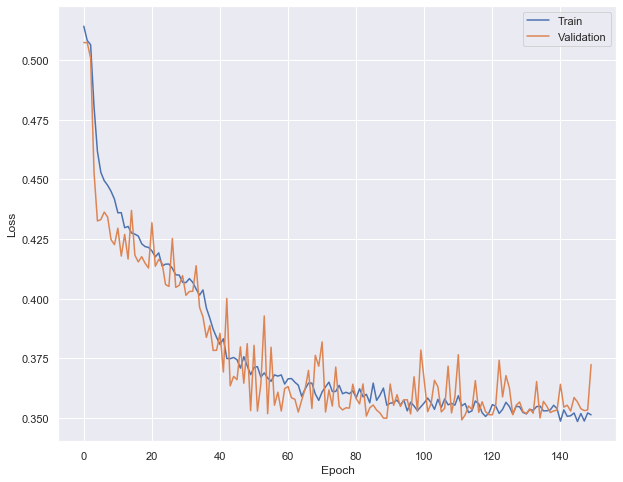

In [28]:
plt.plot(model_fit2.history['loss'])
plt.plot(model_fit2.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

The accuracy continually increases as the number of epochs rises, which is the ideal outcome. Also, the train and validation tend to follow the same path and their values are close which points to no overfitting. 

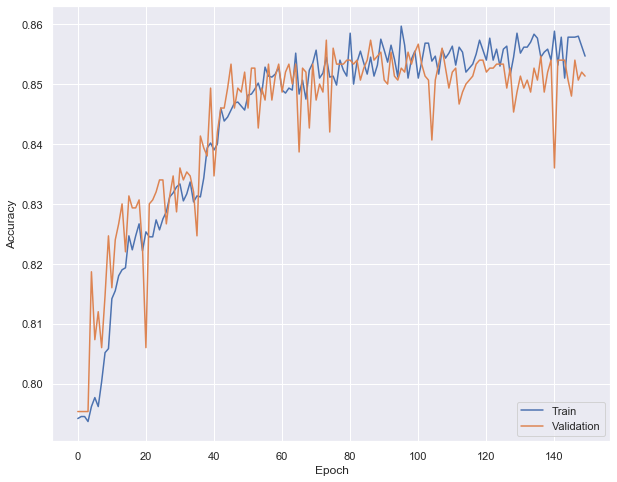

In [29]:
plt.plot(model_fit2.history['accuracy'])
plt.plot(model_fit2.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

In [30]:
train_loss2,train_accuracy2 = model2.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_loss2)
print('Train accuracy:', train_accuracy2)
print('--'*40)
test_loss2,test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
print('Train loss:', test_loss2)
print('Train accuracy:', test_accuracy2)

Train loss: 0.3502851902961731
Train accuracy: 0.8573333621025085
--------------------------------------------------------------------------------
Train loss: 0.3575248595952988
Train accuracy: 0.8515999913215637


Accuracy: 0.8516


Text(0.5, 48.5, 'Predicted')

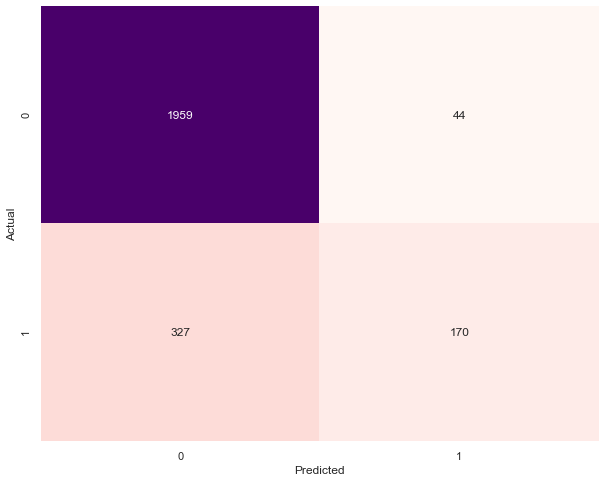

In [31]:
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
print('Accuracy:',accuracy_score(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Model Metrics 

The accuracy and loss might not be as good as the first model but it is pretty close. This model is much better at predicting one outcomes. When the outcome is one this model is right around 60% of the time.

In [32]:
lr2 = model_info(y_test,y_pred2, acc = test_accuracy2, loss = test_loss2, model_name = 'Hyperbolic tangent function')
print(lr2)

                    Model Name  Accuracy      Loss  Specificity  Sensitivity
0  Hyperbolic tangent function    0.8516  0.357525     0.978033     0.342052


### Adam optimizer 

The third model used the rectified activation function with an Adam optimizer. A test was done to see which learning rate was the best for this model. The best learning rate was 0.001 based on accuracy and loss. Also, a dropout layer is added to help the model from overfitting.

In [33]:
from keras.optimizers import Adam

In [34]:
for i in (0.001,0.01,0.1,1):
    model3 = Sequential()
    model3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    model3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    model3.add(keras.layers.Dropout(.40))
    model3.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    ad = Adam(learning_rate=  i)
    model3.compile(optimizer = ad, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model_fit3 = model3.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8)
    train_loss,train_accuracy = model3.evaluate(X_train, y_train, verbose=0)
    print ('Learning Rate ', i)
    print('loss:', train_loss)
    print('accuracy:', train_accuracy)
    print('--'*40)

Learning Rate  0.001
loss: 0.42788593244552614
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Learning Rate  0.01
loss: 0.44365363314946493
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Learning Rate  0.1
loss: 0.5081932463328044
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Learning Rate  1
loss: 0.5326140195528666
accuracy: 0.7946666479110718
--------------------------------------------------------------------------------


In [35]:
model3 = Sequential()
model3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model3.add(keras.layers.Dropout(.40))
model3.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
ad = Adam(learning_rate=  0.001)
model3.compile(optimizer = ad, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_fit3 = model3.fit(X_train, y_train, verbose=0, epochs = 150, batch_size = 8,validation_split =0.2)

As the number of epochs rises the loss function is decreasing. The values between the train and validation are pretty close which shows no overfitting. 

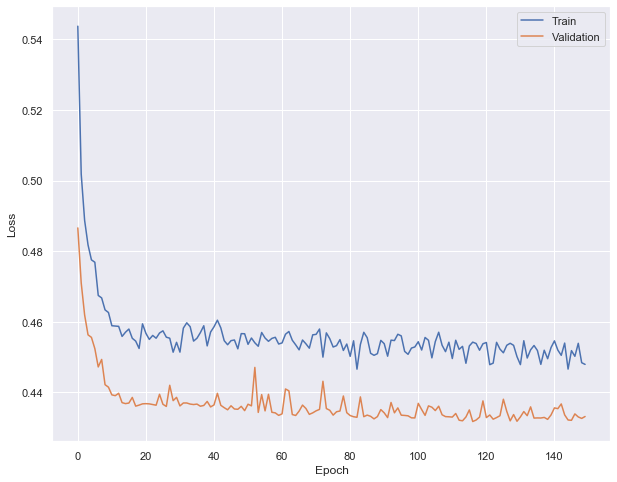

In [36]:
plt.plot(model_fit3.history['loss'])
plt.plot(model_fit3.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

There isn’t much change in the accuracy as the number of epochs rises, which could mean that the model found a local minimum. This can be seen when looking at the confusion matrix below, which shows that the model only predicted zero outcomes. When a model finds a local minimum, it is common to predict the class with the most data points. 

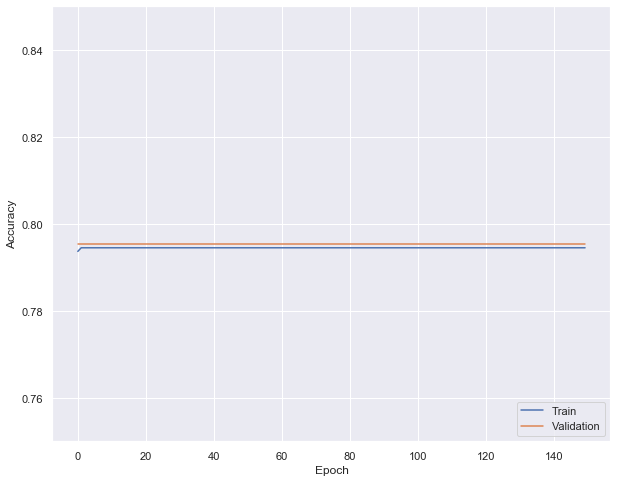

In [37]:
plt.plot(model_fit3.history['accuracy'])
plt.plot(model_fit3.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0.75, 0.85))
plt.legend(['Train', 'Validation'], loc='lower right')

In [38]:
train_loss3,train_accuracy3 = model3.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_loss3)
print('Train accuracy:', train_accuracy3)
print('--'*40)
test_loss3,test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)
print('Train loss:', test_loss3)
print('Train accuracy:', test_accuracy3)

Train loss: 0.42827343441645305
Train accuracy: 0.7946666479110718
--------------------------------------------------------------------------------
Train loss: 0.4205145917415619
Train accuracy: 0.8011999726295471


Accuracy: 0.8012


Text(0.5, 48.5, 'Predicted')

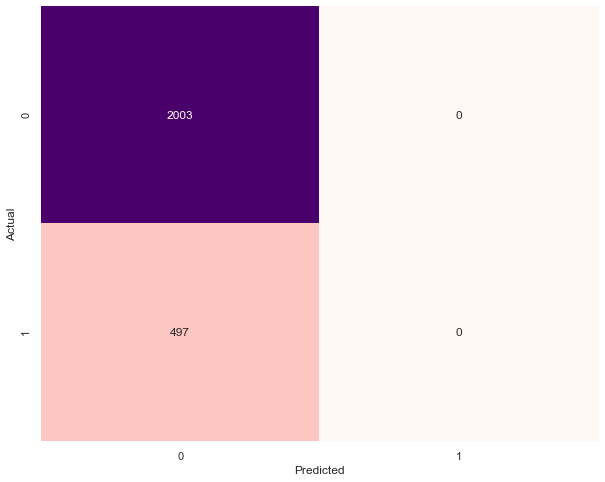

In [39]:
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)
print('Accuracy:',accuracy_score(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Model Metrics

As seen and talked about above, this model isn’t very useful because it doesn’t predict  one outcomes. Its specificity is zero which means it either didn’t predict any one outcomes or didn’t get any right. 

In [40]:
lr3 = model_info(y_test,y_pred3, acc = test_accuracy3, loss = test_loss3, model_name = 'Adam optimizer')
print(lr3)

       Model Name  Accuracy      Loss  Specificity  Sensitivity
0  Adam optimizer    0.8012  0.420515          1.0          0.0


### Conclusion

When viewing the model metrics in one data frame it becomes clear that the Adam optimizer model is not a useful model. When focusing on the other two models, it becomes clear that there isn’t much difference between the two. The Rectified Linear Unit model has the better accuracy, loss, and sensitivity, while the Hyperbolic Tangent Function model has the better specificity. One would think to go for the Rectified Linear Unit model because it is better in three out of four metrics, but when thinking about the problem we are solving, the Hyperbolic Tangent Function model is the one to go with. The Hyperbolic Tangent Function model is the best by far at predicting one outcomes which are people leaving the bank. The banks goal is to predict when a person is going to leave and the Hyperbolic Tangent Function model does this the best. 

In [41]:
df_all = pd.concat([lr1,lr2,lr3], axis = 0)
df_all 

,Model Name,Accuracy,Loss,Specificity,Sensitivity
0,Rectified Linear Unit,0.8664,0.339234,0.961058,0.484909
0,Hyperbolic tangent function,0.8516,0.357525,0.978033,0.342052
0,Adam optimizer,0.8012,0.420515,1.000000,0.000000
